In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [8]:
df.shape

(5110, 12)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [12]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [13]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [31]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [33]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [55]:
objects = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for i in objects:
    print(df[i].nunique())
    print(df[i].unique())

3
['Male' 'Female' 'Other']
2
[1 0]
5
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
2
[1 0]
4
['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [53]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')
print_unique_col_values(df)

gender: ['Male' 'Female' 'Other']
work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [54]:
pd.set_option('future.no_silent_downcasting', True)
df['ever_married'].replace({'Yes':1,'No':0},inplace=True)
df['Residence_type'].replace({'Urban':1,'Rural':0},inplace=True)


In [56]:
df = pd.get_dummies(data=df, columns=['gender','work_type','smoking_status'])
df.columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'stroke', 'gender_Female',
       'gender_Male', 'gender_Other', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

In [57]:
df.dtypes

id                                  int64
age                               float64
hypertension                        int64
heart_disease                       int64
ever_married                        int64
Residence_type                      int64
avg_glucose_level                 float64
bmi                               float64
stroke                              int64
gender_Female                        bool
gender_Male                          bool
gender_Other                         bool
work_type_Govt_job                   bool
work_type_Never_worked               bool
work_type_Private                    bool
work_type_Self-employed              bool
work_type_children                   bool
smoking_status_Unknown               bool
smoking_status_formerly smoked       bool
smoking_status_never smoked          bool
smoking_status_smokes                bool
dtype: object

In [58]:
for column in df:
    if df[column].dtype == 'bool':
        df[column] = df[column].astype(int)

In [59]:
df.dtypes

id                                  int64
age                               float64
hypertension                        int64
heart_disease                       int64
ever_married                        int64
Residence_type                      int64
avg_glucose_level                 float64
bmi                               float64
stroke                              int64
gender_Female                       int64
gender_Male                         int64
gender_Other                        int64
work_type_Govt_job                  int64
work_type_Never_worked              int64
work_type_Private                   int64
work_type_Self-employed             int64
work_type_children                  int64
smoking_status_Unknown              int64
smoking_status_formerly smoked      int64
smoking_status_never smoked         int64
smoking_status_smokes               int64
dtype: object

In [68]:

df.sample(5)

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
5067,21.0,0,0,0,1,138.51,24.3,0,0,1,0,0,0,1,0,0,0,0,1,0
9,78.0,0,0,1,1,58.57,24.2,1,1,0,0,0,0,1,0,0,1,0,0,0
2315,67.0,0,0,1,0,90.35,28.1,0,1,0,0,0,0,0,1,0,1,0,0,0
2076,8.0,0,0,0,1,96.62,16.4,0,1,0,0,0,0,0,0,1,1,0,0,0
2446,80.0,0,0,1,1,64.15,40.5,0,1,0,0,0,0,0,1,0,0,0,1,0


In [69]:
cols_to_scale = ['age','avg_glucose_level','bmi']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])


In [82]:
df['age'] = scaler.inverse_transform(df)

ValueError: operands could not be broadcast together with shapes (4909,20) (3,) (4909,20) 

In [70]:
df.sample(5)

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
1951,1.000000,0,0,1,1,0.205706,0.136312,0,1,0,0,0,0,1,0,0,1,0,0,0
2303,0.914551,0,0,1,0,0.758333,0.264605,0,1,0,0,1,0,0,0,0,0,0,0,1
4320,0.536133,1,0,1,0,0.131428,0.158076,0,0,1,0,0,0,0,1,0,0,0,1,0
912,0.353027,0,0,1,1,0.047272,0.211913,0,1,0,0,0,0,1,0,0,0,1,0,0
2523,0.914551,1,1,1,0,0.767750,0.254296,0,0,1,0,0,0,1,0,0,1,0,0,0


In [71]:
for col in df:
    print(f'{col}: {df[col].unique()}')

age: [8.16894531e-01 9.75585938e-01 5.97167969e-01 9.63378906e-01
 9.87792969e-01 9.02343750e-01 8.41308594e-01 9.51171875e-01
 7.43652344e-01 6.58203125e-01 6.09375000e-01 7.80273438e-01
 9.14550781e-01 7.31445312e-01 8.65722656e-01 6.33789062e-01
 1.00000000e+00 7.92480469e-01 6.94824219e-01 5.11718750e-01
 5.84960938e-01 8.77929688e-01 7.07031250e-01 9.26757812e-01
 4.75097656e-01 9.38964844e-01 7.68066406e-01 8.90136719e-01
 6.82617188e-01 5.48339844e-01 8.53515625e-01 7.19238281e-01
 8.04687500e-01 5.23925781e-01 8.29101562e-01 5.72753906e-01
 6.45996094e-01 4.62890625e-01 6.70410156e-01 5.60546875e-01
 3.89648438e-01 6.21582031e-01 1.69921875e-01 3.56445312e-02
 9.66796875e-02 4.50683594e-01 4.87304688e-01 4.26269531e-01
 2.43164062e-01 5.36132812e-01 3.04199219e-01 3.28613281e-01
 2.79785156e-01 2.06542969e-01 1.57714844e-01 4.78515625e-02
 1.94335938e-01 2.67578125e-01 3.65234375e-01 3.53027344e-01
 1.33300781e-01 2.55371094e-01 2.18750000e-01 4.01855469e-01
 2.91992188e-01 4.3

In [74]:
X = df.drop('stroke', axis='columns')
y = df['stroke']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=5)

In [76]:
X_train.shape


(3927, 19)

In [77]:
X_test.shape

(982, 19)

In [78]:
y_train.shape

(3927,)

In [79]:
y_test.shape

(982,)

In [84]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(19, input_shape=(19,), activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8277 - loss: 0.5779
Epoch 2/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9612 - loss: 0.1837
Epoch 3/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9582 - loss: 0.1690
Epoch 4/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9614 - loss: 0.1502
Epoch 5/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9583 - loss: 0.1521
Epoch 6/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9592 - loss: 0.1436
Epoch 7/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9576 - loss: 0.1496
Epoch 8/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9570 - loss: 0.1493
Epoch 9/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9576 - loss: 0.1451
Epoch 10/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9557 - loss: 0.1500


In [85]:
model.evaluate(X_test, y_test)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9668 - loss: 0.1234  


[0.14928747713565826, 0.9572301506996155]

In [86]:
yp = model.predict(X_test)
yp[:5]

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.06988472],
       [0.01541879],
       [0.01326945],
       [0.0074269 ],
       [0.01009352]], dtype=float32)

In [87]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [91]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [92]:
y_test[:10]

4259    0
39      1
1081    0
771     0
931     0
1292    0
4343    0
1130    0
3571    0
3826    0
Name: stroke, dtype: int64

In [93]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       940
           1       0.00      0.00      0.00        42

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.92      0.96      0.94       982



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(95.72222222222221, 0.5, 'Truth')

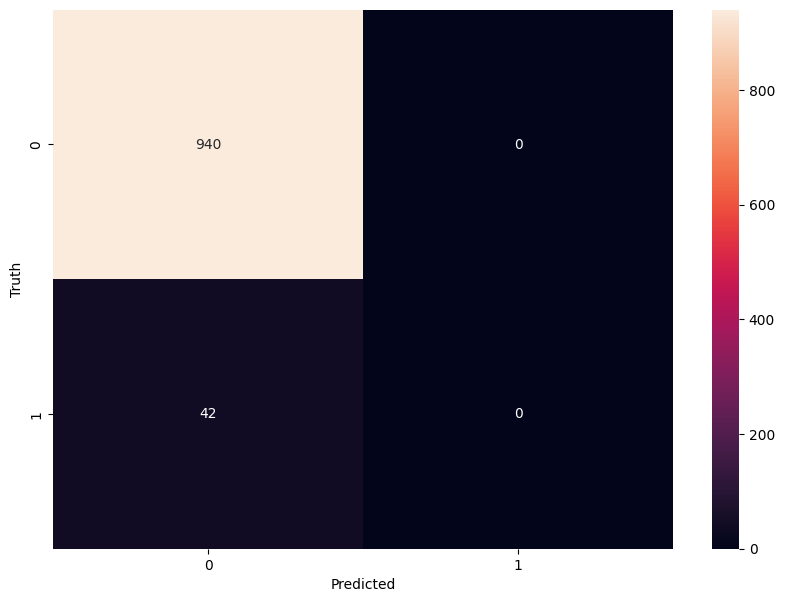

In [94]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')